<a target="_blank" href="https://colab.research.google.com/github/fdavenport/CIVE480A6-climate-change-impacts/blob/main/lectures/03_Reading_Climate_Data_2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# CIVE 480A6: Climate Change Risks and Impacts
## Week 3: Analyzing Global Temperature Data - Maps edition

Today's Objectives:
1. Learn how to read gridded climate data ("netcdf" files) in Python
2. Learn how to create a global map
3. Analyze and discuss temperature changes in different regions

## Part 1: Reading Gridded Climate Data ("netcdf" files)
Today we will be working with "netcdf" files, which are commonly used to store climate data. This type of data is also referred to as raster data.

<img src="https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/main/lectures/img/raster.png" width="700">

In order to read the data into Python, we will import a library called "[Xarray](https://docs.xarray.dev/en/stable/)".

In [1]:
import xarray as xr

We will be reading temperature data from the [NASA Goddard Institute for Space Studies](GISS)(https://data.giss.nasa.gov/gistemp/). Unlike last week where we looked at global average temperature anomlies, this week we will be looking at gridded temperature data so we can analyze how temperature is changing in different regions.

In [2]:
#The temperature data has already been added to the course github page at the following link:
gistemp_data_url = "https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/main/lectures/data/gistemp_annual_data.nc"

# This file is too large to read from github, so we will need to download it within colab
# using something called "wget"
!wget {gistemp_data_url} -O gistemp_annual_data.nc

--2024-09-03 15:11:00--  https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/main/lectures/data/gistemp_annual_data.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8517309 (8.1M) [application/octet-stream]
Saving to: ‘gistemp_annual_data.nc’

gistemp_annual_data 100%[===================>]   8.12M  --.-KB/s    in 0.1s    

2024-09-03 15:11:00 (76.9 MB/s) - ‘gistemp_annual_data.nc’ saved [8517309/8517309]



In [4]:
## read in the data file

data = xr.open_dataset("gistemp_annual_data.nc")


In [5]:
## take a look at the data
data


<xarray.Dataset> Size: 9MB
Dimensions:      (year: 144, lat: 82, lon: 180)
Coordinates:
  * lat          (lat) float32 328B -81.0 -79.0 -77.0 -75.0 ... 77.0 79.0 81.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * year         (year) int64 1kB 1880 1881 1882 1883 ... 2020 2021 2022 2023
Data variables:
    tempanomaly  (year, lat, lon) float32 9MB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-08-07 14:09:14 by SBBX_to_nc 2.0 - ILAND=1200,...

This dataset uses latitude and longitude coordinates and has 2 degree x 2 degree resolution.

<img src="https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/main/lectures/img/lat_lon.png" width="700">

<img src="https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/main/lectures/img/Equirectangular_projection.jpg" width="700">

In [6]:
# select a specific time period from the data

data.sel(year = 2023)


<xarray.Dataset> Size: 60kB
Dimensions:      (lat: 82, lon: 180)
Coordinates:
  * lat          (lat) float32 328B -81.0 -79.0 -77.0 -75.0 ... 77.0 79.0 81.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
    year         int64 8B 2023
Data variables:
    tempanomaly  (lat, lon) float32 59kB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-08-07 14:09:14 by SBBX_to_nc 2.0 - ILAND=1200,...

In [7]:
# select a specific location from the data

data.sel(year = 2023, lat = 39, lon = -105)


<xarray.Dataset> Size: 20B
Dimensions:      ()
Coordinates:
    lat          float32 4B 39.0
    lon          float32 4B -105.0
    year         int64 8B 2023
Data variables:
    tempanomaly  float32 4B ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-08-07 14:09:14 by SBBX_to_nc 2.0 - ILAND=1200,...

In [9]:
data.sel(year = 2023, lat = 39, lon = -105)["tempanomaly"].values

array(0.8633334, dtype=float32)

In [11]:
# select a time range or spatial range from the data

data.sel(year = slice(2014, 2023), lat = 39, lon = -105)["tempanomaly"].values



array([0.6475    , 1.4833332 , 1.5625    , 1.5433334 , 0.965     ,
       0.06499999, 1.2724999 , 1.4716667 , 0.7058334 , 0.8633334 ],
      dtype=float32)

## Part 2: Making a Map

Now we will make a map of the data so that we can take a closer look at it. We will use the matplotlib library again.

In [12]:
# load the matplotlib library

import matplotlib.pyplot as plt



In [27]:
# select coordinate data to use for the map

map_year = 2023
x = data["lon"]
y = data["lat"]
z = data.sel(year = map_year)["tempanomaly"]


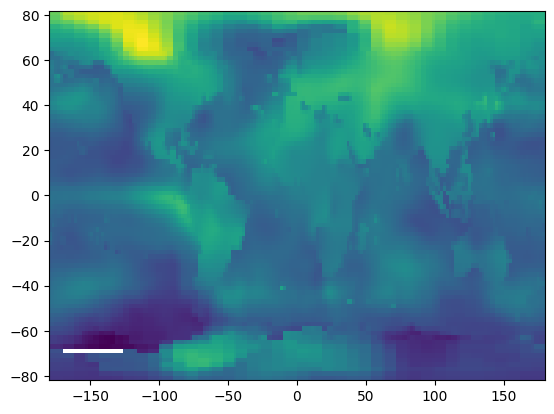

In [15]:
# create an empty figure and axis and add the data


fig, ax = plt.subplots()


ax.pcolormesh(x, y, z)


Let's add some labeling and change the colors of the map. You can find different colors available here: https://matplotlib.org/stable/gallery/color/colormap_reference.html


Text(0.5, 1.0, '2020 Temperature Anomaly')

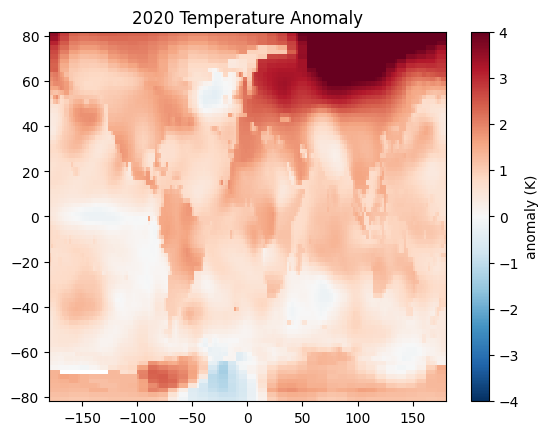

In [23]:
# customize the colors and labels of the map


fig, ax = plt.subplots()


tempanomaly = ax.pcolormesh(x, y, z, cmap = "RdBu_r", vmax = 4, vmin = -4)

plt.colorbar(tempanomaly, label = "anomaly (K)")
ax.set_title(str(map_year) + " Temperature Anomaly")



In order to make the map easier to read and more visually appealing, we will also load some functions from a library called [Cartopy](https://scitools.org.uk/cartopy/docs/latest/):

In [24]:
## the cartopy library needs to be installed before we can import it
!pip install cartopy

In [25]:
## load some functions from the cartopy library

import cartopy.feature as cfeature
import cartopy.crs as ccrs



Now we can add geographic boundaries to our map to help with visualization. To do that though, we need to be more explicit about the coordinate reference systems that we are using.

The coordinate reference systems (CRS) defines how the three-dimensional globe should be displayed (or "projected") onto a two-dimensional map.

<img src="https://raw.githubusercontent.com/fdavenport/CIVE480A6-climate-change-impacts/main/lectures/img/spatial-projections.png" width="500">

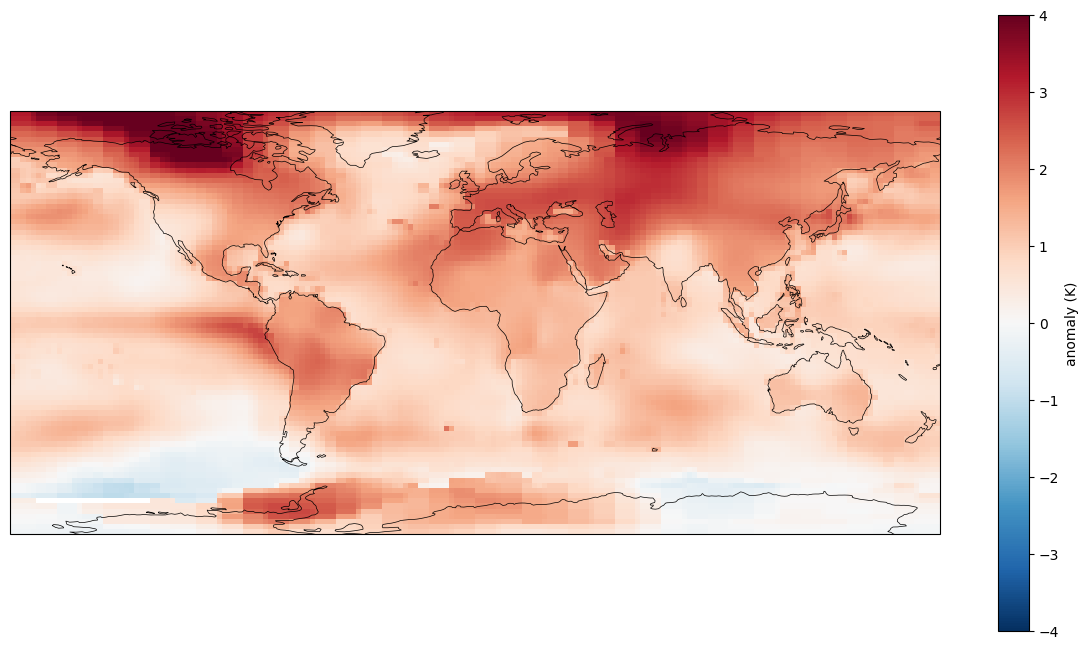

In [32]:
## create a map with the projection defined and with coastlines added


fig, ax = plt.subplots(figsize = (15, 8), subplot_kw = {"projection": ccrs.PlateCarree()})


tempanomaly = ax.pcolormesh(x, y, z, cmap = "RdBu_r", vmin = -4, vmax = 4, transform = ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE.with_scale("110m"), linewidth = 0.5)

plt.colorbar(tempanomaly, label = "anomaly (K)")

## Part 3: Analyzing Temperature Changes

In [37]:
data_recent = data.sel(year = slice(2014, 2023)).mean(dim = "year")

In [38]:
data_recent

<xarray.Dataset> Size: 60kB
Dimensions:      (lat: 82, lon: 180)
Coordinates:
  * lat          (lat) float32 328B -81.0 -79.0 -77.0 -75.0 ... 77.0 79.0 81.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
Data variables:
    tempanomaly  (lat, lon) float32 59kB 0.8637 0.8637 0.8637 ... 3.431 3.431

In [39]:
x = data_recent["lon"]
y = data_recent["lat"]
z = data_recent["tempanomaly"]

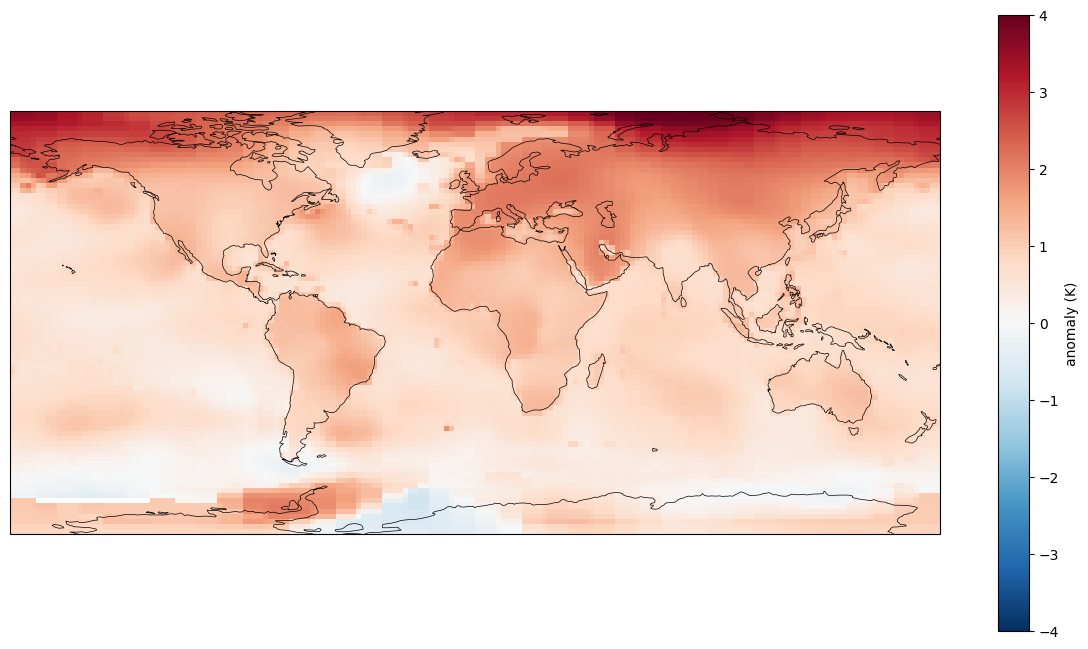

In [40]:
fig, ax = plt.subplots(figsize = (15, 8), subplot_kw = {"projection": ccrs.PlateCarree()})


tempanomaly = ax.pcolormesh(x, y, z, cmap = "RdBu_r", vmin = -4, vmax = 4, transform = ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE.with_scale("110m"), linewidth = 0.5)

plt.colorbar(tempanomaly, label = "anomaly (K)")

In [42]:
data

<xarray.Dataset> Size: 9MB
Dimensions:      (year: 144, lat: 82, lon: 180)
Coordinates:
  * lat          (lat) float32 328B -81.0 -79.0 -77.0 -75.0 ... 77.0 79.0 81.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * year         (year) int64 1kB 1880 1881 1882 1883 ... 2020 2021 2022 2023
Data variables:
    tempanomaly  (year, lat, lon) float32 9MB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-08-07 14:09:14 by SBBX_to_nc 2.0 - ILAND=1200,...

In [43]:
data_1900 = data.sel(year = slice(1885, 1915)).mean(dim = "year")

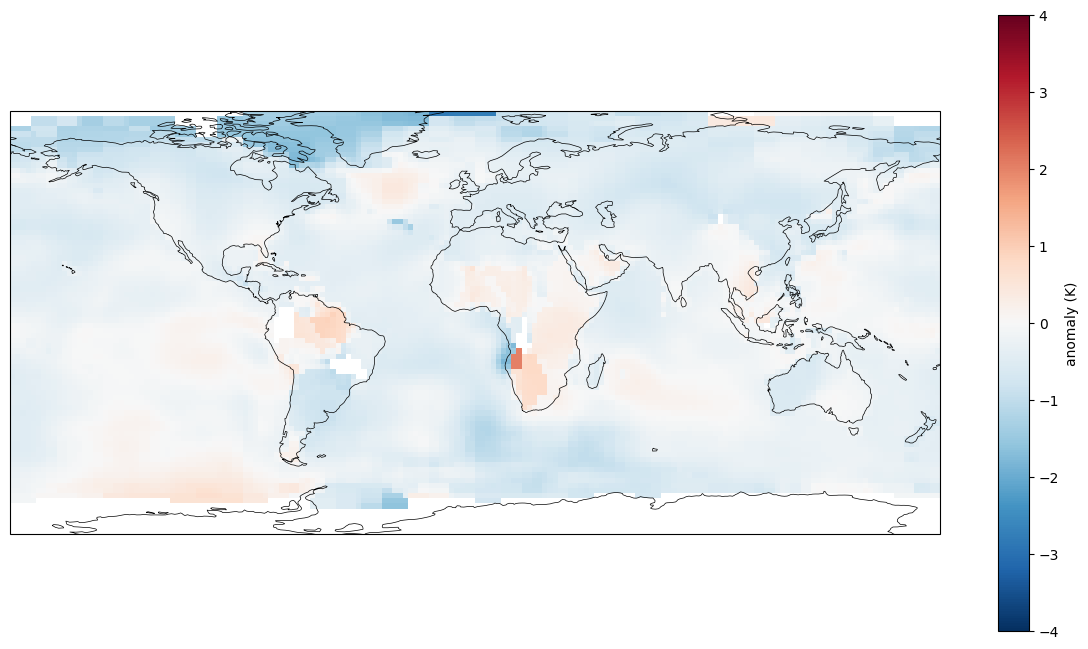

In [44]:
fig, ax = plt.subplots(figsize = (15, 8), subplot_kw = {"projection": ccrs.PlateCarree()})


tempanomaly = ax.pcolormesh(x, y, data_1900["tempanomaly"], cmap = "RdBu_r", vmin = -4, vmax = 4, transform = ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE.with_scale("110m"), linewidth = 0.5)

plt.colorbar(tempanomaly, label = "anomaly (K)")

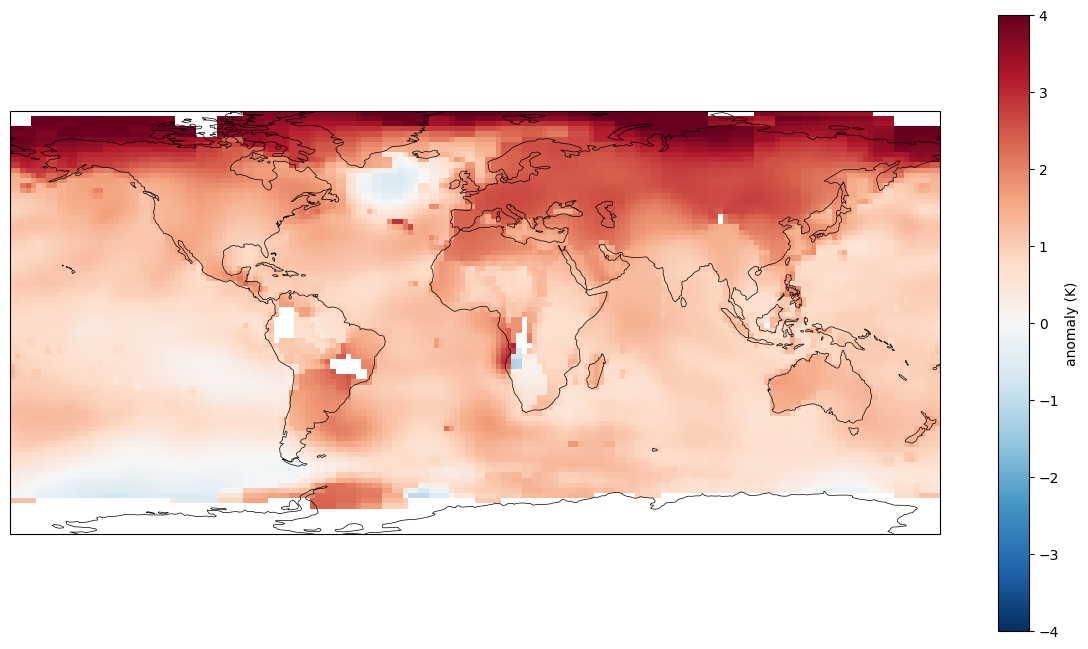

In [45]:
z = data_recent["tempanomaly"] - data_1900["tempanomaly"]

fig, ax = plt.subplots(figsize = (15, 8), subplot_kw = {"projection": ccrs.PlateCarree()})


tempanomaly = ax.pcolormesh(x, y, z, cmap = "RdBu_r", vmin = -4, vmax = 4, transform = ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE.with_scale("110m"), linewidth = 0.5)

plt.colorbar(tempanomaly, label = "anomaly (K)")
